In [ ]:
import pandas as pd
import numpy as np

In [3]:
dataset=pd.read_csv('/content/gold.csv')

In [4]:
dataset.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4718.000000,4682.000000,4718.000000,4682.000000,4718.000000,4682.000000
mean,959.990812,959.728684,625.068432,624.921846,773.892791,773.843716
std,449.456217,449.487106,324.491391,324.544149,351.555806,351.696708
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000
25%,449.112500,448.612500,244.576750,244.463500,361.393500,361.338750
50%,1113.125000,1112.275000,717.145000,716.210500,874.354500,875.141500
75%,1293.750000,1294.225000,939.065500,939.266500,1085.967750,1085.816250
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000


In [5]:
dataset.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [6]:
import pandas as pd


dataset['Date'] = pd.to_datetime(dataset['Date'])


dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset['Weekday'] = dataset['Date'].dt.weekday

X = dataset[['Year', 'Month', 'Day', 'Weekday']]
y = dataset['USD (PM)']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.fillna(y_train.mean())
y_test=y_test.fillna(y_test.mean())

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)




LinearRegression()

In [8]:
y_pred=model.predict(x_test)

In [9]:
def predict(data):
  print(model.predict(data))

In [10]:
print(y_pred[0])

637.2149093777116


In [11]:
user_date = input("Enter a date (YYYY-MM-DD): ")
input_date = pd.to_datetime(user_date)

input_features = [[input_date.year, input_date.month, input_date.day, input_date.weekday()]]
predicted_price = model.predict(input_features)

print(f"Predicted Gold Price for {user_date} (USD PM): {predicted_price[0]:.2f}")

Enter a date (YYYY-MM-DD): 2023-09-30
Predicted Gold Price for 2023-09-30 (USD PM): 1894.47


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
from sklearn.metrics import mean_squared_error
accuracy=mean_squared_error(y_test,y_pred)

In [13]:
print(accuracy)

59980.24930905189


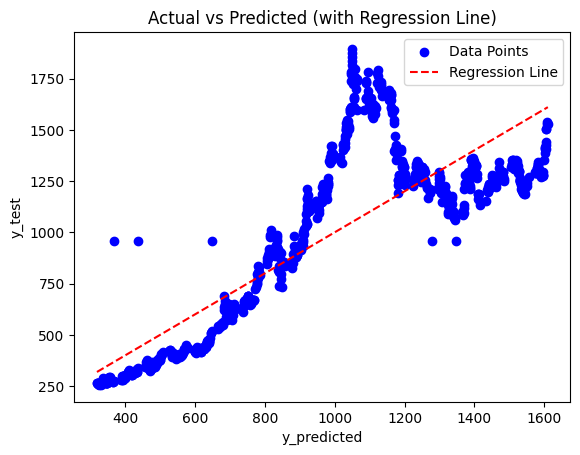

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_pred, y_test, color='blue', label='Data Points')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--', label="Regression Line")
plt.xlabel("y_predicted")
plt.ylabel("y_test")
plt.title("Actual vs Predicted (with Regression Line)")
plt.legend()
plt.show()


599.0
